In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from mir_eval.separation import bss_eval_sources
from sklearn.metrics import mean_squared_error

from utils import load_and_preprocess

## Load ground truths and separated outputs

### Tiki3 dev1
Run the following cell when running on Tiki3 dev1 data

In [ ]:
gt_vocal_path = 'data/Tiki3_dev1/vocals.wav'
gt_inst_path = 'data/Tiki3_dev1/guitar.wav'

est_vocal_paths = [
    'output/Tiki3_dev1/NMF/component_1.wav',
    'output/Tiki3_dev1/NMF_clustering/component_1.wav',
    'output/Tiki3_dev1/ICA/comp1.wav',
    'output/Tiki3_dev1/IVA/comp1.wav',
    'output/Tiki3_dev1/ILRMA/comp1.wav',
]
est_inst_paths = [
    'output/Tiki3_dev1/NMF/component_0.wav',
    'output/Tiki3_dev1/NMF_clustering/component_0.wav',
    'output/Tiki3_dev1/ICA/comp0.wav',
    'output/Tiki3_dev1/IVA/comp0.wav',
    'output/Tiki3_dev1/ILRMA/comp0.wav',
]

### Die with a smile
Run the following cell when running on Die with a smile

In [ ]:
gt_vocal_path = 'data/vocal_trimmed.wav'
gt_inst_path = 'data/inst_trimmed.wav'

est_vocal_paths = [
    'output/die_with_a_smile/NMF/component_1.wav',
    'output/die_with_a_smile/NMF_clustering/component_1.wav',
    'output/die_with_a_smile/ICA/comp1.wav',
    'output/die_with_a_smile/IVA/comp1.wav',
    'output/die_with_a_smile/ILRMA/comp1.wav',
]
est_inst_paths = [
    'output/die_with_a_smile/NMF/component_0.wav',
    'output/die_with_a_smile/NMF_clustering/component_0.wav',
    'output/die_with_a_smile/ICA/comp0.wav',
    'output/die_with_a_smile/IVA/comp0.wav',
    'output/die_with_a_smile/ILRMA/comp0.wav',
]

In [31]:
sr, gt_vocal, gt_inst, est_vocals, est_insts = load_and_preprocess(
    gt_vocal_path, gt_inst_path, est_vocal_paths, est_inst_paths
)

[GT] Sample rate: 44100, Vocal len: 2293628, Inst len: 2293628
Loading estimated vocal: output/die_with_a_smile/NMF/component_1.wav, instrumental: output/die_with_a_smile/NMF/component_0.wav ...
[Est] Sample rate: 44100, Vocal len: 2245120, Inst len: 2245120
Loading estimated vocal: output/die_with_a_smile/NMF_clustering/component_1.wav, instrumental: output/die_with_a_smile/NMF_clustering/component_0.wav ...
[Est] Sample rate: 44100, Vocal len: 2245120, Inst len: 2245120
Loading estimated vocal: output/die_with_a_smile/ICA/comp1.wav, instrumental: output/die_with_a_smile/ICA/comp0.wav ...
[Est] Sample rate: 44100, Vocal len: 2245568, Inst len: 2245568
Loading estimated vocal: output/die_with_a_smile/IVA/comp1.wav, instrumental: output/die_with_a_smile/IVA/comp0.wav ...
[Est] Sample rate: 44100, Vocal len: 2245632, Inst len: 2245632
Loading estimated vocal: output/die_with_a_smile/ILRMA/comp1.wav, instrumental: output/die_with_a_smile/ILRMA/comp0.wav ...
[Est] Sample rate: 44100, Vocal

## Calculate metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")
methods = [ep.split('/')[-2] for ep in est_vocal_paths]
rows = []

for i, (est_vocal, est_inst) in enumerate(zip(est_vocals, est_insts)):

    gt = np.vstack([gt_vocal, gt_inst])      # shape: (2, T)
    est = np.vstack([est_vocal, est_inst])   # shape: (2, T)

    SDR, SIR, SAR, perm = bss_eval_sources(gt, est)

    MSE_v = mean_squared_error(gt_vocal, est_vocal)
    MSE_i = mean_squared_error(gt_inst, est_inst)

    rows.append({
        'Method': methods[i],
        'Source': 'Vocal',
        'SDR': SDR[0],
        'SAR': SAR[0],
        'SIR': SIR[0],
        'MSE': MSE_v,
        'Perm': perm[0]
    })

    rows.append({
        'Method': methods[i],
        'Source': 'Instrumental',
        'SDR': SDR[1],
        'SAR': SAR[1],
        'SIR': SIR[1],
        'MSE': MSE_i,
        'Perm': perm[1]
    })
df = pd.DataFrame(rows)
print(df)

           Method        Source        SDR        SAR       SIR       MSE  \
0             NMF         Vocal  -6.043469  -5.405816  9.108490  0.045690   
1             NMF  Instrumental -13.843170 -10.253610 -0.698799  0.031817   
2  NMF_clustering         Vocal  -6.380794  -5.691433  8.681090  0.045892   
3  NMF_clustering  Instrumental -14.904015 -10.863019 -1.520908  0.028749   
4             ICA         Vocal  -6.951034  -5.994635  7.058787  0.063479   
5             ICA  Instrumental -20.022453 -16.379044 -1.086720  0.044662   
6             IVA         Vocal  -6.944274  -6.048208  7.362299  0.065005   
7             IVA  Instrumental -19.301969 -12.550758 -5.485470  0.035036   
8           ILRMA         Vocal  -6.807668  -5.863281  7.146621  0.065846   
9           ILRMA  Instrumental -20.061396 -12.411945 -6.588401  0.037167   

   Perm  
0     0  
1     1  
2     0  
3     1  
4     0  
5     1  
6     0  
7     1  
8     0  
9     1  


## Plot metrics

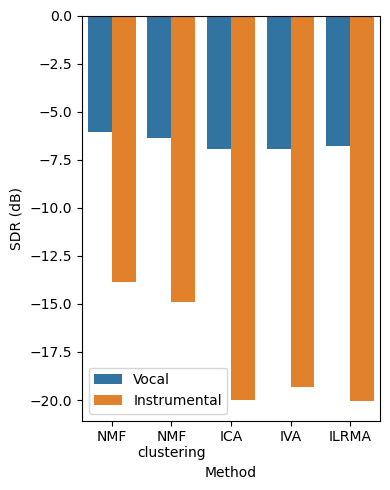

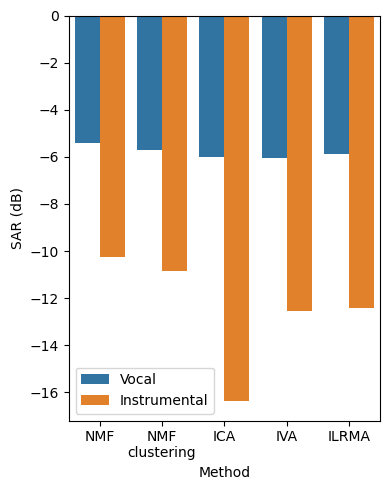

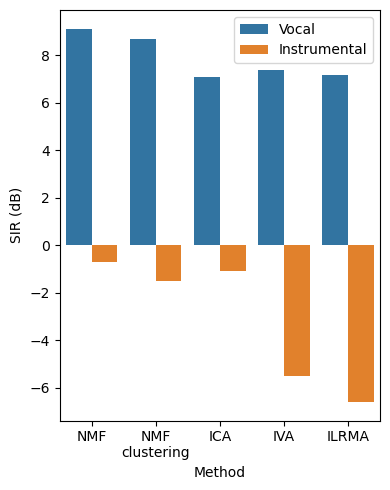

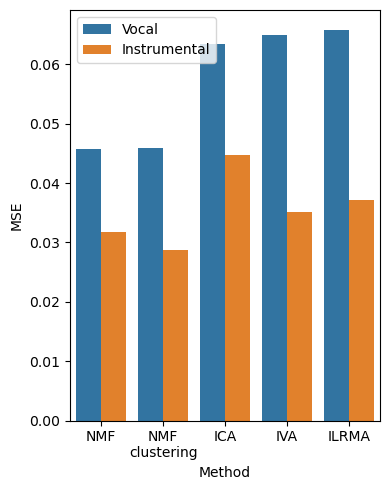

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['SDR', 'SAR', 'SIR', 'MSE']
df['Method'] = df['Method'].str.replace('_', '\n')

for metric in metrics:
    plt.figure(figsize=(4, 5))
    sns.barplot(data=df, x='Method', y=metric, hue='Source')
    # plt.title(f'{metric} Comparison across Methods')
    plt.ylabel(metric + ' (dB)' if metric != 'MSE' else metric)
    # plt.xlabel('Separation Method')
    plt.legend(loc=None)
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
